In [163]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import pylab as pl

In [164]:
weather_dataset1 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2015_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
weather_dataset2 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2016_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
weather_dataset3 = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2017_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)
weather_dataset = []
# weather_dataset.append(weather_dataset1)
weather_dataset.append(weather_dataset2)
weather_dataset.append(weather_dataset3)
weather_dataset = pd.concat(weather_dataset)

# Using All Weather Variables

In [165]:
# Remove unused columns and reorder 
weather_dataset = weather_dataset[['precipMM', 'tempC', 'windspeedKmph', 'cond', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatIndexC', 'dewPointC', 'windChillC', 'windGustKmph', 'feelsLikeC']]

In [166]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.loc[:, weather_dataset.columns != 'precipMM'].values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = weather_dataset['precipMM']

## Multiple Linear Regression using train_test_split

In [167]:
# Splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.50, shuffle=False)

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [168]:
p = linreg.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train = r2_score(Y_test, p)
rmse_train = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train)
print("RMSE", rmse_train)

R2 score -14.8009030587
RMSE 0.132134516624


In [169]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [-1.28905351 -0.61200557 -0.03368545  0.18154429 -0.24658707 -0.02260472
 -0.01941224  2.02880548 -0.18420447  1.27341307  0.88790827 -2.03142757
  0.        ]


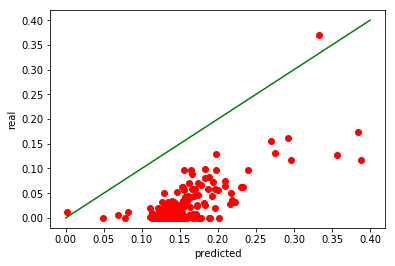

In [170]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

## Multiple Linear Regression using 10-fold cross validation

In [171]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(x_train, y_train)
    p = linreg.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [172]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train)
print('RMSE on training: %.6f'  %rmse_train)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv)

Method: Simple Linear Regression
R2 score on training: -14.800903
RMSE on training: 0.132135
RMSE on 10-fold CV: 0.033749


# Using Correlated Weather Variables

In [173]:
# Remove unused columns and reorder 
weather_dataset = weather_dataset[['precipMM', 'humidity', 'cloudcover', 'dewPointC']]

In [174]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.loc[:, weather_dataset.columns != 'precipMM'].values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = weather_dataset['precipMM']

## Multiple Linear Regression using train_test_split

In [175]:
# Splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.50, shuffle=False)

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [176]:
p = linreg.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train_corr = r2_score(Y_test, p)
rmse_train_corr = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train_corr)
print("RMSE", rmse_train_corr)

R2 score 0.30933998161
RMSE 0.0276253305926


In [177]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ 0.22501016  0.0587982   0.05057256  0.        ]


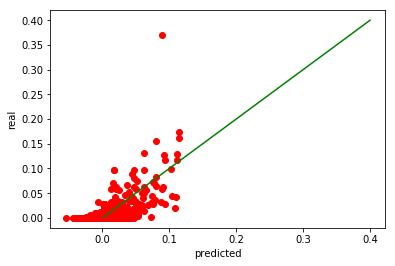

In [178]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

## Multiple Linear Regression using 10-fold cross validation

In [179]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(x_train, y_train)
    p = linreg.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv_corr = np.sqrt(xval_err/len(x))

In [180]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train_corr)
print('RMSE on training: %.6f'  %rmse_train_corr)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv_corr)

Method: Simple Linear Regression
R2 score on training: 0.309340
RMSE on training: 0.027625
RMSE on 10-fold CV: 0.039109
